In [1]:
from collections.abc import Callable
import numpy as np
import pandas as pd

In [2]:
def RungeKutta40(f: Callable[[np.float64, np.float64], np.float64],
                 t_span: np.ndarray,
                 y_init: np.float64,
                 n: np.int64,
                 )-> pd.DataFrame:
    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start = t_span[0], stop=t_span[1], num=n+1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init
    
    for i in range(0, n, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * h,  y[i] + 0.5 * h * k1)
        k3 = f(t[i] + 0.5 * h,  y[i] + 0.5 * h * k1)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)
    return df

              t            y        exact        error
0  1.0000000000 0.0000000000 0.0000000000 0.0000000000
1  1.1000000000 0.0406981891 0.0411044424 0.0004062533
2  1.2000000000 0.0623163791 0.0628945147 0.0005781356
3  1.3000000000 0.0716065730 0.0722409471 0.0006343741
4  1.4000000000 0.0728252331 0.0734585435 0.0006333104
5  1.5000000000 0.0687394254 0.0693440008 0.0006045754
6  1.6000000000 0.0611952956 0.0617588352 0.0005635396
7  1.7000000000 0.0514519399 0.0519701819 0.0005182420
8  1.8000000000 0.0403841368 0.0408569895 0.0004728527
9  1.9000000000 0.0286090699 0.0290385327 0.0004294627
10 2.0000000000 0.0165675754 0.0169566105 0.0003890351


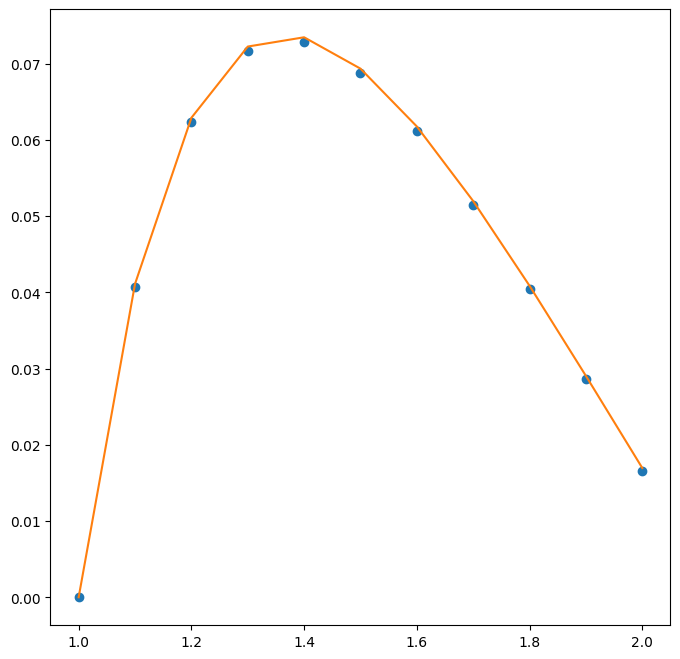

In [3]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    def f(t: np.float64, y: np.float64) -> np.float64:
        return t**(-2)*(np.cos(t)-2*t*y)
    t_span = np.array(object=[1, 2], dtype=np.float64)
    y_init = 0.0
    n = 10
    df = RungeKutta40(f=f, t_span=t_span, y_init=y_init, n=n)

    def y(t: np.float64) -> np.float64:
        return t**(-2)*(np.sin(t)-np.sin(1))
    df.loc[:, 'exact'] = df.loc[:, 't'].apply(func=y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'], df.loc[:,'y'], 'o')
    ax.plot(df.loc[:,'t'], df.loc[:,'exact'], '-')
    plt.show()